# Tutorial 01 - Procesamiento de Imágenes

En este tutorial realizaremos operaciones básicas sobre imágenes.


In [239]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Setup

Este tutorial se puede ejecutar local en Jupyter lab o utilizar Google Colab.

## En Google Colab
Este tutorial se provee junto con archivos de recursos dentro de un archivo ".zip".
En caso de ejecutar en Google Colab hay que:

1. Descomprimir el zip en algún lado
2. Subir el contenido del zip a Google Drive en alguna carpeta (por ejemplo `udesa/I308/tutoriales/tutorial_01`)
3. Abrir este notebook .ipynb


In [240]:
import os
import sys

# TODO: establecer el path en caso de trabajar con Colab
DRIVE_DIR = "TERCERO 2DO CUATRI/Tutorial Vision/tutorial_01"

# detecta si estamos corriendo en Google Colab
try:
  from google.colab import drive
  COLAB = True
except:
  COLAB = False

if COLAB:
    # monta Google Drive
    drive.mount('/content/drive')

    base_path = "/content/drive/MyDrive/"
    path = os.path.join(base_path, DRIVE_DIR)

    %cd {path}
    sys.path.append(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TERCERO 2DO CUATRI/Tutorial Vision/tutorial_01


In [241]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Librerías de manejo de imágenes

Si bien en este tutorial vamos a utilizar OpenCV, en Python existen varias librerías para manipular imágenes, cada una con diferentes fortalezas dependiendo del tipo de tarea.

Entre las más populares tenemos:

- [OpenCV](https://opencv.org/)
- [Pillow](https://pillow.readthedocs.io/en/stable/#)
- [scikit-image](https://scikit-image.org/)




## OpenCV

OpenCV es una librería esencial de visón por computadora.

El proyecto inicial fue desarrollado por Intel Research (Rusia), ~1999 con el propósito de tener una base de código eficiente y estandarizada evitando  "reinventar la rueda" cada vez. Luego fue creciendo y ganando popularidad, en 2006 fue impulsada por la empresa Willow Garage (creadora del Robot Operating System, ROS). Hoy en día es mantenida por varias empresas.

Sus principales características son Open Source, código optimizado en C++ portable, con conectores a varios otros lenguajes como Python y Javascript.



## Documentación

- [Referencia](https://docs.opencv.org/4.10.0/), [Python](https://docs.opencv.org/4.10.0/d6/d00/tutorial_py_root.html)


## Repositorios

Está codeada en C y C++, se puede compilar optimizado para la arquitectura de hard donde se dersea correr.

- [librería](https://github.com/opencv/opencv)

- [contrib](https://github.com/opencv/opencv_contrib) (código experimental, y algoritmos no incluidos por default)

- [OpenCV python bindings](https://github.com/opencv/opencv-python).
los bindings de Python nos permiten invocar código en C y C++, desde código python, de esta manera tenemos lo mejor de ambos mundos: Podemos trabajar a alto nivel sin tener que meternos con cuestiones implementativas como administrar memoria y aritmética de punteros, y teniendo todo el poder de cómputo de código optimizado y compilado para nuestra plataforma.


## OpenCV. Instalación

La instalación dependerá de dónde queramos correr y lo que queramos hacer.
En este curso vamos a usarlo desde los bindings de python.

### Instalación Local

Podemos instalar la librería pre-compilada desde pypi, desde [pypi.org](https://pypi.org/project/opencv-python/)  con el comando:

```
  pip install opencv-python
```
Esto puede demorar unos minutos.

### Instalación en Google Colab

En Google Colab, OpenCV ya viene instalado, y no hace falta instalarlo.


In [242]:
# instalar OpenCV si fuera necesario
!pip install opencv-python

In [243]:
# verifiquemos la versión de OpenCV que viene instalada en colab,
# la última version estable es:
import cv2

print(cv2.__version__)

4.12.0


# Manejo de Color y visualización

## Cargando imágenes con OpenCV

En el directorio de recursos `res` está la imagen "frog.jpg",
visualicémosla abriendola desde el panel izquierdo (files browser).

Ahora carguémosla en memoria usando la función [`imread`](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#gacbaa02cffc4ec2422dfa2e24412a99e2) de OpenCV.



In [244]:
import cv2

image = cv2.imread("res/frog.jpg")

In [245]:
# 1. de qué tipo es la variable img?
type(image)

numpy.ndarray

In [246]:
# 2. tamaño de la imagen y canales
image.shape

(1024, 1024, 3)

In [247]:
# 3. de que tipo es cada elemento de la matriz?
image.dtype

dtype('uint8')

In [248]:
# 4. cómo vemos los valores numéricos de un pixel?
image[222, 333, :]

array([137, 153, 136], dtype=uint8)

In [249]:
# 5. extraigamos un recorte de la imagen. Cómo?
# numpy slicing
image[:3, :4, 0]

array([[40, 40, 41, 42],
       [41, 41, 42, 42],
       [42, 42, 42, 42]], dtype=uint8)

## Graficando imágenes con MatPlotLib

Para visualizar la imagen podemos usar la función [`imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) de matplotlib


In [250]:
# si no está instalado matplotlib, instalémoslo:
!pip install -qq matplotlib

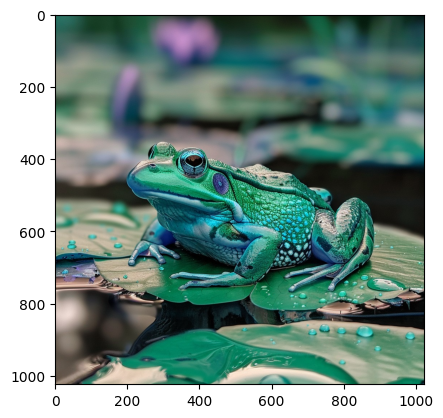

In [251]:
from matplotlib import pyplot as plt

# Grafiquemos la imagen usando matplotlib
# ¿Qué está pasando con los colores?

plt.imshow(image)
plt.show()

## Convirtiendo entre espacios de colores


(1024, 1024, 3)


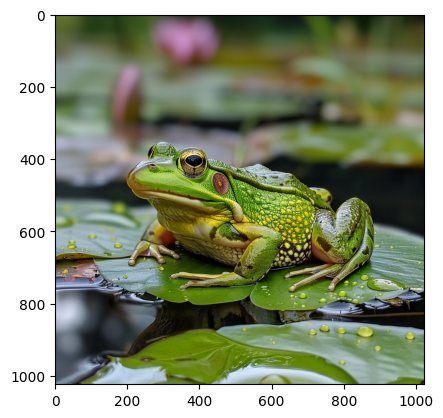

In [252]:
# OpenCV trabaja por default con imágenes en BGR, pero Matplotlib espera las imágenes en RGB!!!
# convirtámosla de BGR a RGB que es como MPL espera.

# al ser un array de numpy, puedo hacer slicing para separar los canales
import numpy as np

b = image[:, :, 0]
g = image[:, :, 1]
r = image[:, :, 2]

image_rgb = np.stack([r, g, b], axis=2)

print(image_rgb.shape)
plt.imshow(image_rgb)
plt.show()


## Conversión entre espacios de colores usando OpenCV


OpenCV provee la funcion [cv2.cvtColor](https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) que permite transformar imagenes entre espacios de color.


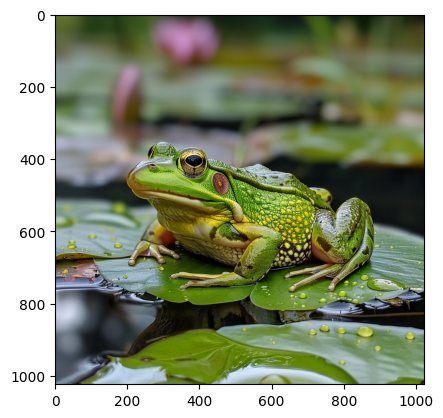

In [253]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()


## Escala de grises


(1024, 1024)


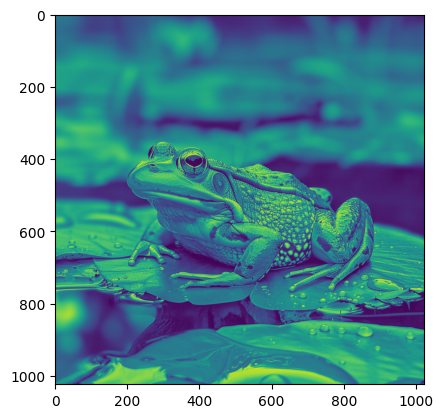

In [254]:
# cvtColor nos permite llevar una imagen color a escala de grises
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print(img_gray.shape)

plt.imshow(img_gray)
plt.show()

# Pero no se ve en gris se ve en azul y verde!!!
# ¿qué está pasando?


Cuando graficamos una imagen de un solo canal,
matplotlib usa un ["colormap"](https://matplotlib.org/stable/users/explain/colors/colormaps.html) para mapear los colores que se visualizan. Es básicamente una función que asigna un color en RGB para cada valor posible en la imagen.

Por default se usa `cmap='viridis'`, pero hay muchos otros colormaps como 'inferno', 'plasma', 'gray', etc.



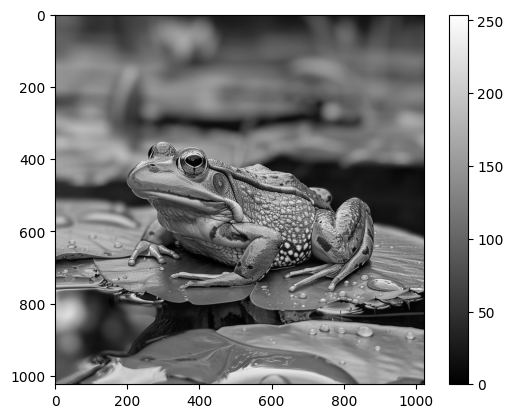

In [255]:
# Si queremos que la escala de grises se grafique en gris,
# entonces tenemos que usar cmap 'gray'
plt.imshow(img_gray, cmap='gray')

# esto incluye la barra lateral con la referencia de los valores de cada color
plt.colorbar()
plt.show()


## Espacio de colores HSV

la función de OpenCV cvtColor permite transformar una imagen al espacio de color HSV.


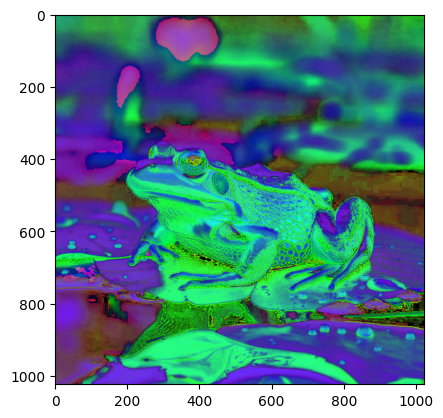

In [256]:
# algo similar sucede con el espacio de color HSV
# img = cv2.imread("res/hsv.png")
img = cv2.imread("res/frog.jpg")
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# ¿Qué sucede cuando queremos graficar una imagen HSV de opencv con matplotlib?
plt.imshow(hsv)
plt.show()


## Transformaciones en HSV
En general uno no plotea cosas en HSV, más bien convierte a HSV
para que sea más fácil realizar alguna transformación en ese espacio
y luego vuelve a RGB (o BGR) para visualizar los resultados.

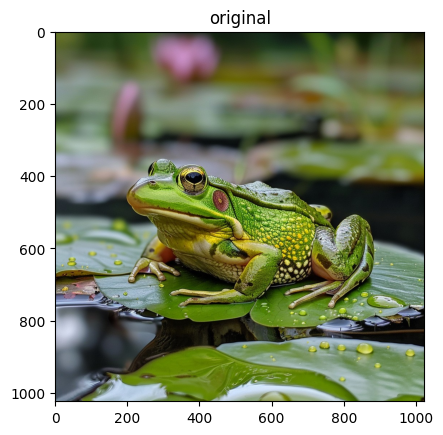

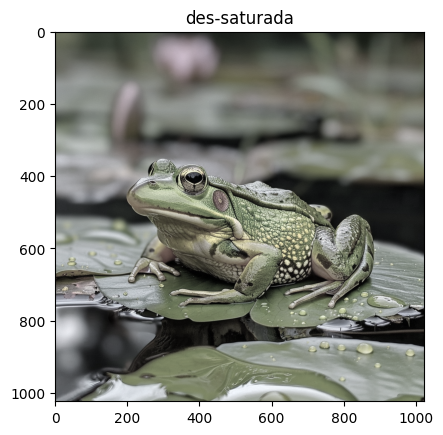

In [257]:
# Por Ejemplo:
# disminuyamos la saturación del color de la imagen:

# 1. convertimos de BGR a HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 2. separamos los canales
h, s, v = cv2.split(hsv)

# 3. bajamos la saturación a un 25% de la original
s = (s * 0.25).astype(np.uint8)

# 4. mergeamos los canales
hsv_desat = cv2.merge([h, s, v])

# 5. pasamos a RGB para plotear
rgb_original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rgb_desat = cv2.cvtColor(hsv_desat, cv2.COLOR_HSV2RGB)

plt.imshow(rgb_original)
plt.title("original")
plt.show()

plt.imshow(rgb_desat)
plt.title("des-saturada")
plt.show()

## HSV en OpenCV

Ojo porque HSV [en OpenCV es con HSV medio "tricky"](https://docs.opencv.org/4.x/de/d25/imgproc_color_conversions.html#color_convert_rgb_hsv).

OpenCV trabaja con valores entre 0 y 255 para los canales S y V.
Pero el canal H lo representa con un ángulo entre 0 y 180º. (el resto del mundo usa 360º)

¿Por qué imaginamos que hicieron tal cosa?

## Parámetros de Matplotlib

Algunos parámetros últiles para gráficos de imágenes usando matplotlib pueden ser:


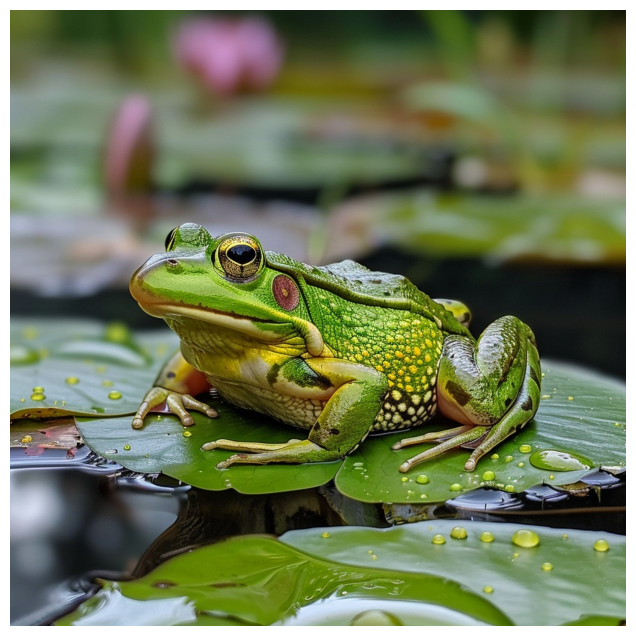

In [258]:
plt.figure(figsize=(8, 8)) # plot más grande
plt.imshow(image_rgb)
plt.axis('off') # apaga los ejes
plt.show()

## Graficando varias imágenes con subplot

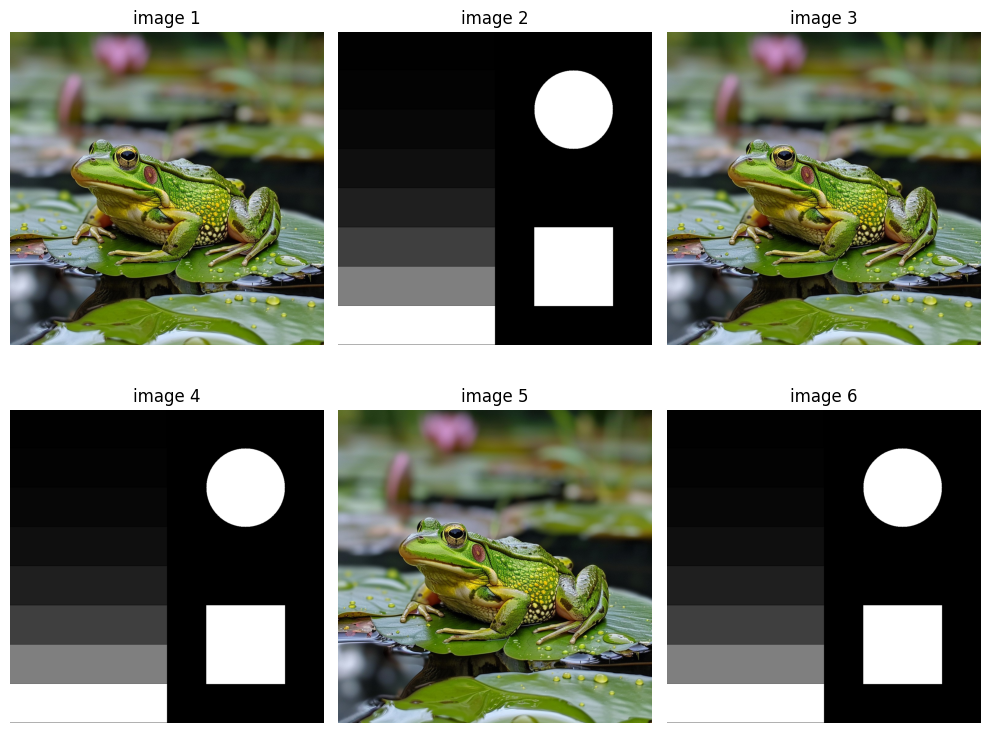

In [259]:
# Si tenemos varias imágenes:
im1 = cv2.imread("res/frog.jpg")
im2 = cv2.imread("res/img.png")

images = [
    im1, im2, im1,
    im2, im1, im2,
]

titles = [
    f"image {i+1}"
    for i in range(len(images))
]

# podemos graficarlas en grilla usando "subplots"
fig, axes = plt.subplots(2, 3, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    im = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    title = titles[i]
    ax.imshow(im)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


## librería i308-utils

Graficar varias imágenes en una grilla es una tarea que vamos a hacer seguido.

¿Cómo podríamos reducir un poco el código "boilerplate"?

=> llevamos el código a una función genérica.

Se provee este pequeño [paquete de utilidades](https://github.com/udesa-vision/i308-utils), que incluye entre otras cosas, algunas funciones para facilitar las tareas repetitivas.

In [260]:
!pip install -qq git+https://github.com/udesa-vision/i308-utils.git

  Preparing metadata (setup.py) ... done


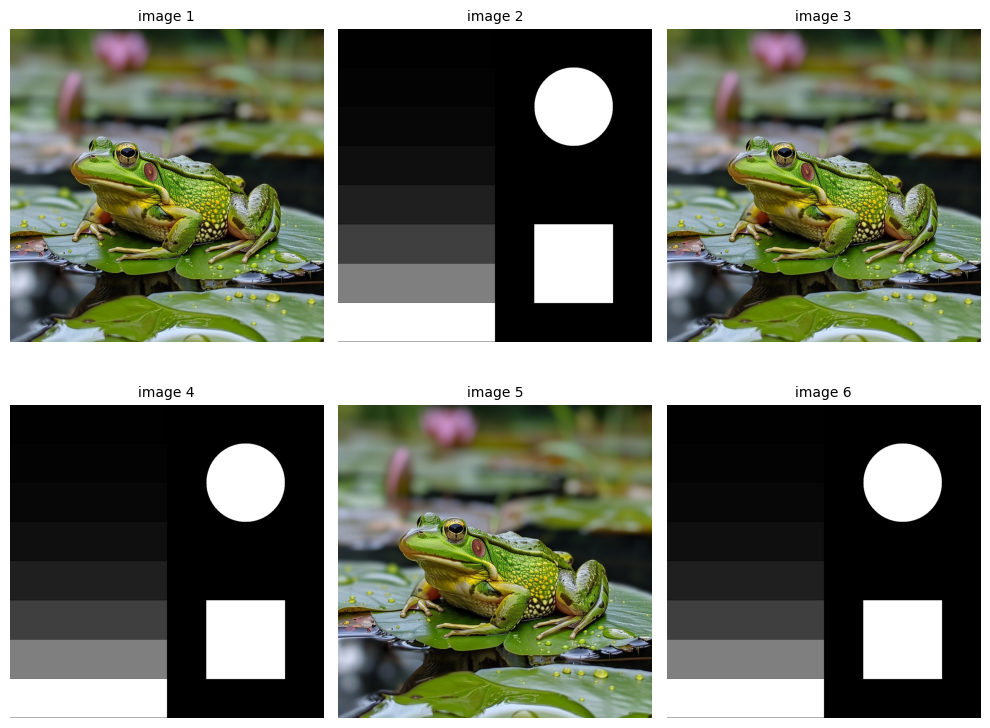

In [261]:
from i308_utils import show_images

show_images(
    images,
    titles,
    grid=(2, 3),
    #title="hello"
    #subtitle="hello",
    #figsize=(6, 4)
)

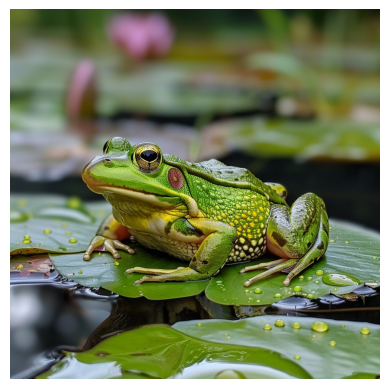

In [262]:
# también se provee la función imshow
from i308_utils import imshow

imshow(image)

# Transformaciones puntuales

En adelante, por simplicidad los próximos ejercicios los vamos a realizar con imágenes en escala de grises.

Los mismos conceptos se pueden extender a más canales.


In [263]:
# Usaremos el modificador cv2.IMREAD_GRAYSCALE para leerla
# en escala de grises:
# (es equivalente a leer la imagen en color y luego convertirla a escala de grises)

image = cv2.imread("res/frog.jpg", flags=cv2.IMREAD_GRAYSCALE)

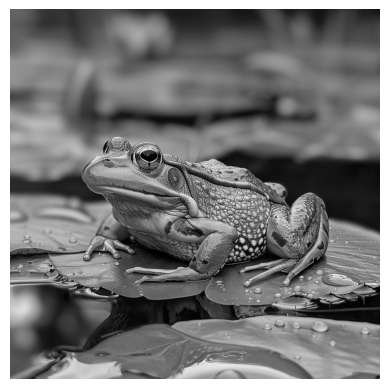

In [264]:
imshow(image)

## Generar una imagen sintética

las imagenes se pueden trabajar como arrays de numpy.

Podemos generar un array de numpy y generar imagenes sintéticas por codigo.

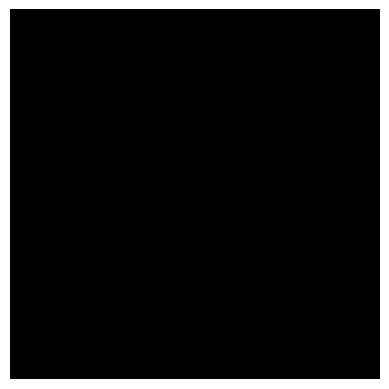

In [265]:
# Las imágenes se representan con arrays de numpy.
# ¿cómo puedo crear una imagen sintética?
import numpy as np

# 3x3 en grayscale con todos los pixeles negros?

f = np.zeros((3, 3), dtype='uint8')
imshow(f)

In [266]:
# usando numpy generemos:
# - dos imágenes sintéticas f y g de 8x8 pixeles,
# - en escala de grises,
# - con todos valores =1, excepto en las diagonales (i, i),
#    donde vamos haciendo crecer el valor exponencialmente. 2 ^ i - 1
#
# import numpy as np
# img = ...

import numpy as np
f = np.ones((8, 8), dtype='uint8')
g = np.ones((8, 8), dtype='uint8')

for i in range(8):
  f[i, i] = 2 ** (i + 1) - 1
  g[8 - i - 1, i] =  2 ** (i + 1) - 1

In [267]:
f

array([[  1,   1,   1,   1,   1,   1,   1,   1],
       [  1,   3,   1,   1,   1,   1,   1,   1],
       [  1,   1,   7,   1,   1,   1,   1,   1],
       [  1,   1,   1,  15,   1,   1,   1,   1],
       [  1,   1,   1,   1,  31,   1,   1,   1],
       [  1,   1,   1,   1,   1,  63,   1,   1],
       [  1,   1,   1,   1,   1,   1, 127,   1],
       [  1,   1,   1,   1,   1,   1,   1, 255]], dtype=uint8)

In [268]:
g

array([[  1,   1,   1,   1,   1,   1,   1, 255],
       [  1,   1,   1,   1,   1,   1, 127,   1],
       [  1,   1,   1,   1,   1,  63,   1,   1],
       [  1,   1,   1,   1,  31,   1,   1,   1],
       [  1,   1,   1,  15,   1,   1,   1,   1],
       [  1,   1,   7,   1,   1,   1,   1,   1],
       [  1,   3,   1,   1,   1,   1,   1,   1],
       [  1,   1,   1,   1,   1,   1,   1,   1]], dtype=uint8)

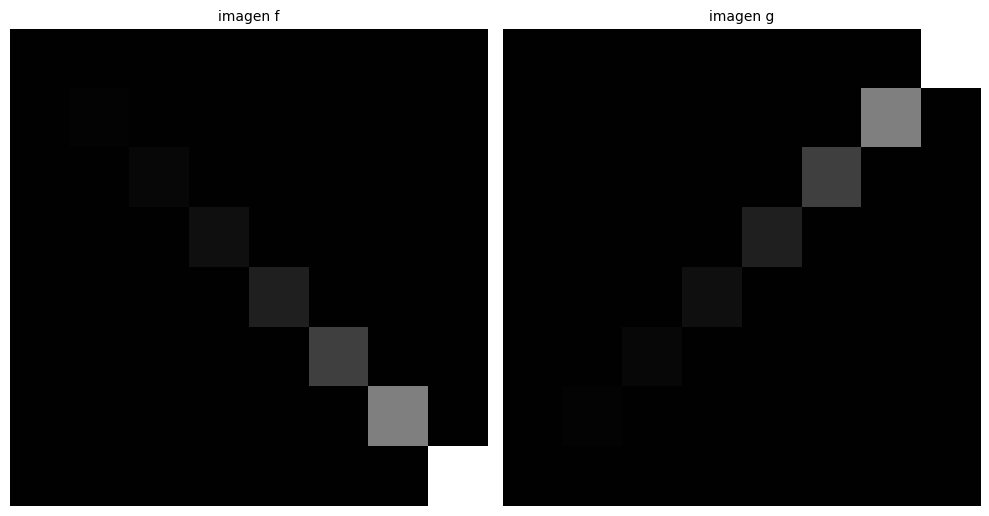

In [269]:
show_images([f, g], ['imagen f', 'imagen g'])

# Guardando una imagen

Usando la función de OpenCV imwrite, guardemos la imagen f en el directorio de recursos como archivo ".png"

OBS: el formato se auto-detecta según la extensión especificada en el nombre de archivo


In [270]:
# Guarda la imagen f en el directorio de recursos como res/f.png
filename = "res/f.png"
#filename = "x/y.jpg"
cv2.imwrite(filename, f)


True

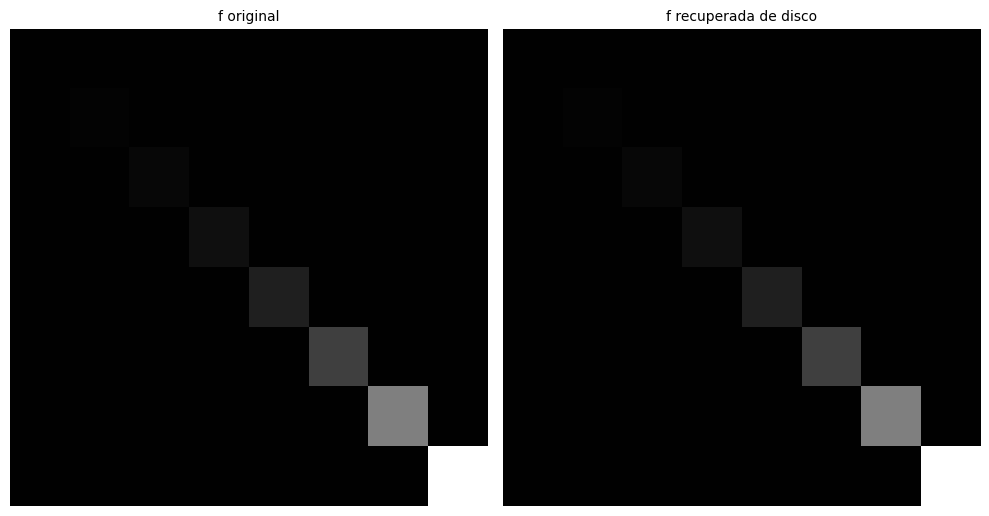

In [271]:
import os

f2 = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

show_images([f, f2], ["f original", "f recuperada de disco"])

## Transformaciones - Operadores Puntuales


Sean $f$, $g$ y $h$ imágenes

$f: V → W $,

$g: V → W $,

$h: V → W $,

con $ V \subset Z^2 $, finito y contiguo, y $ W \subseteq [0, L-1] $. Donde L es la cantidad de niveles de gris.

Sean r, s y t los niveles de gris de f, g y h respectivamente:

$ f(x, y) = r $,

$ g(x, y) = s $,

$ h(x, y) = t $.


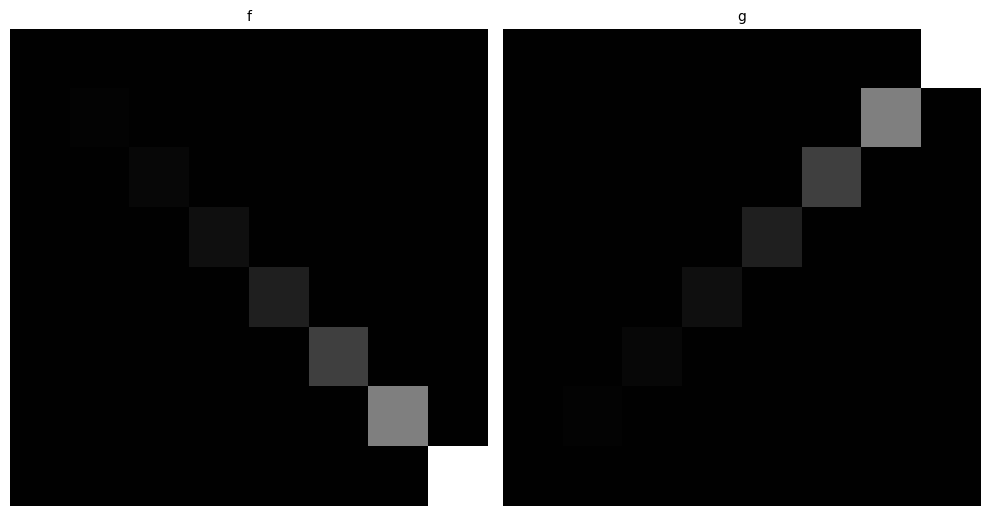

In [272]:
show_images([f, g], ["f", "g"])

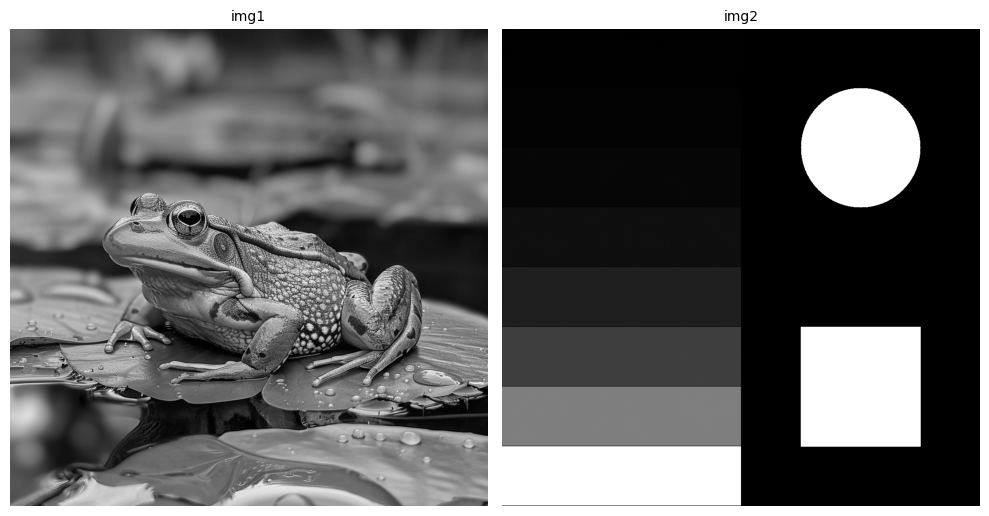

In [273]:
img1 = cv2.imread("res/frog.jpg", flags=cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("res/img.png", flags=cv2.IMREAD_GRAYSCALE)

show_images([img1, img2], ["img1", "img2"])

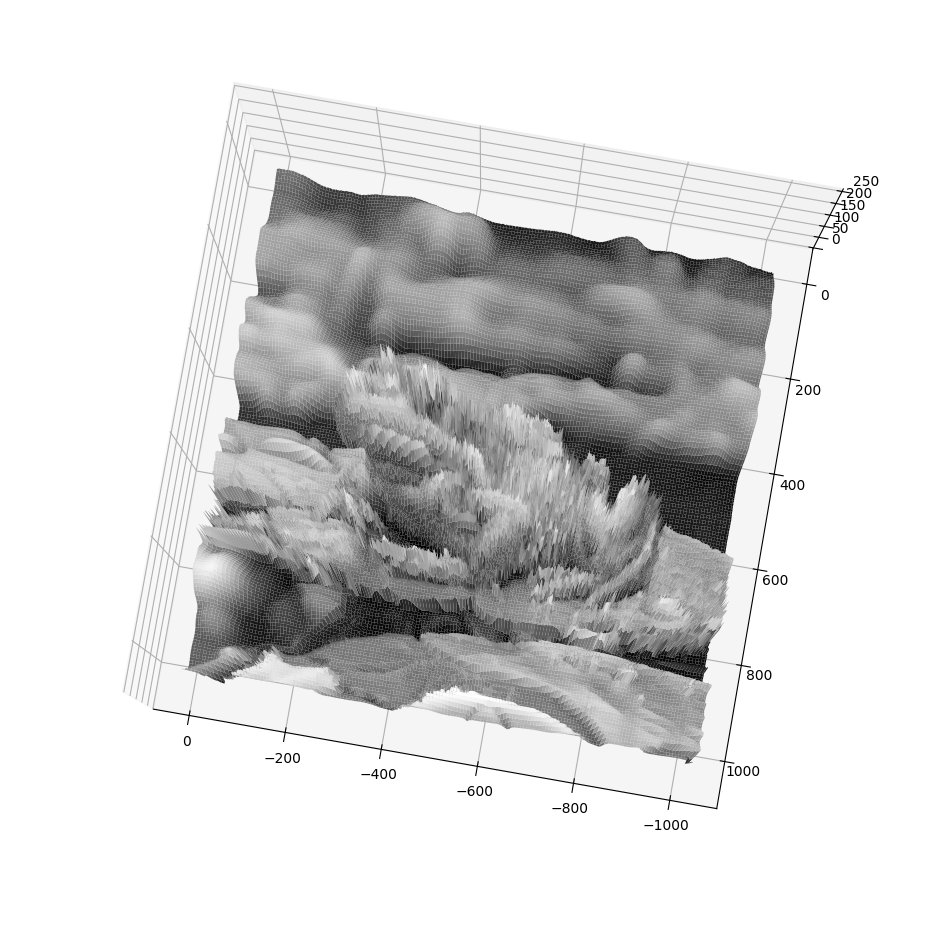

In [274]:
# Imagen pensada como funcion de dos variables:
# usando matplotlib graficar la imagen como una superfice en 3d

def plot_3d(img):
    h, w = img.shape
    xx, yy = np.meshgrid(np.arange(w), np.arange(h))

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')


    ax.plot_surface(
        -xx, yy,
        img, cmap='gray',
        rstride=6, cstride=6,
        linewidth=0,
        antialiased=True
    )
    ax.view_init(elev=85, azim=100)

    plt.show()

plot_3d(img1)

# Suma de imagenes

Implementar la transformación suma $ h = T (f, g) $ como

$ T =
    \begin{cases}
      r + s & \text{si (r+s) < L} \\
      L-1 & \text{else} \\
    \end{cases}
$



In [275]:
f

array([[  1,   1,   1,   1,   1,   1,   1,   1],
       [  1,   3,   1,   1,   1,   1,   1,   1],
       [  1,   1,   7,   1,   1,   1,   1,   1],
       [  1,   1,   1,  15,   1,   1,   1,   1],
       [  1,   1,   1,   1,  31,   1,   1,   1],
       [  1,   1,   1,   1,   1,  63,   1,   1],
       [  1,   1,   1,   1,   1,   1, 127,   1],
       [  1,   1,   1,   1,   1,   1,   1, 255]], dtype=uint8)

In [276]:
g

array([[  1,   1,   1,   1,   1,   1,   1, 255],
       [  1,   1,   1,   1,   1,   1, 127,   1],
       [  1,   1,   1,   1,   1,  63,   1,   1],
       [  1,   1,   1,   1,  31,   1,   1,   1],
       [  1,   1,   1,  15,   1,   1,   1,   1],
       [  1,   1,   7,   1,   1,   1,   1,   1],
       [  1,   3,   1,   1,   1,   1,   1,   1],
       [  1,   1,   1,   1,   1,   1,   1,   1]], dtype=uint8)

In [277]:
f + g

array([[  2,   2,   2,   2,   2,   2,   2,   0],
       [  2,   4,   2,   2,   2,   2, 128,   2],
       [  2,   2,   8,   2,   2,  64,   2,   2],
       [  2,   2,   2,  16,  32,   2,   2,   2],
       [  2,   2,   2,  16,  32,   2,   2,   2],
       [  2,   2,   8,   2,   2,  64,   2,   2],
       [  2,   4,   2,   2,   2,   2, 128,   2],
       [  2,   2,   2,   2,   2,   2,   2,   0]], dtype=uint8)

In [278]:
def suma(f, g):

    # función suma

    h = f.astype(float) + g.astype(float)
    h[h > 255] = 255
    return h.astype('uint8')


In [279]:
suma(f, g)

array([[  2,   2,   2,   2,   2,   2,   2, 255],
       [  2,   4,   2,   2,   2,   2, 128,   2],
       [  2,   2,   8,   2,   2,  64,   2,   2],
       [  2,   2,   2,  16,  32,   2,   2,   2],
       [  2,   2,   2,  16,  32,   2,   2,   2],
       [  2,   2,   8,   2,   2,  64,   2,   2],
       [  2,   4,   2,   2,   2,   2, 128,   2],
       [  2,   2,   2,   2,   2,   2,   2, 255]], dtype=uint8)

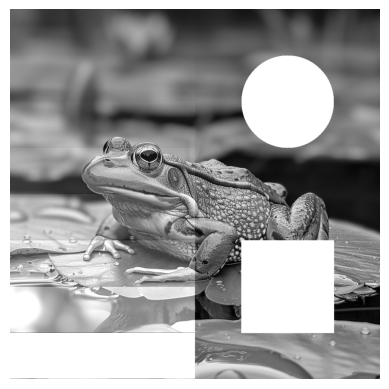

In [280]:
sum = suma(img1, img2)

imshow(sum)

In [281]:
# OBS OpenCV provee la funcion addWeighted que generaliza esta operacion
# sumando dos imagenes de forma ponderada (blending)
# h = alpha * f + beta * g + gamma

cv2.addWeighted(src1=f, alpha=1, src2=g, beta=1, gamma=0)

array([[  2,   2,   2,   2,   2,   2,   2, 255],
       [  2,   4,   2,   2,   2,   2, 128,   2],
       [  2,   2,   8,   2,   2,  64,   2,   2],
       [  2,   2,   2,  16,  32,   2,   2,   2],
       [  2,   2,   2,  16,  32,   2,   2,   2],
       [  2,   2,   8,   2,   2,  64,   2,   2],
       [  2,   4,   2,   2,   2,   2, 128,   2],
       [  2,   2,   2,   2,   2,   2,   2, 255]], dtype=uint8)

In [282]:
# Qué pasa si las imagenes no son del mismo tamaño?
# Qué pasa si las imagenes no tienen el mismo numero de canales?

In [283]:
# Overflow:
# ¿Qué pasa si en un pixel r+s > 255?
# ¿Cómo hacemos para operar con las imágenes sin perder información?

## Normalización de una imagen

Si convertimos nuestra imagen de `uint8` a `float` podemos operar en $ R $ por fuera del conjunto $ W $, y luego volver al conjunto $ W $ mediante una normalización.

Implementar la normalizacion min-max, usando

$ T(x) = (L - 1) * \frac{x - min_x}{max_x - min_x} $

In [284]:
def normalizar(x):

    # normalización min-max

    x = x.astype(float)
    n = (x - np.min(x)) / (np.max(x) - np.min(x))
    n = (255 * n).round().astype('uint8')
    return n

In [285]:
normalizar(f.astype(float) + g.astype(float))

array([[  0,   0,   0,   0,   0,   0,   0, 255],
       [  0,   2,   0,   0,   0,   0, 126,   0],
       [  0,   0,   6,   0,   0,  62,   0,   0],
       [  0,   0,   0,  14,  30,   0,   0,   0],
       [  0,   0,   0,  14,  30,   0,   0,   0],
       [  0,   0,   6,   0,   0,  62,   0,   0],
       [  0,   2,   0,   0,   0,   0, 126,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255]], dtype=uint8)

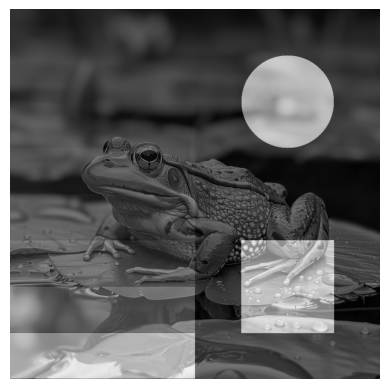

In [286]:
imshow(
    normalizar(img1.astype(float) + img2.astype(float))
)

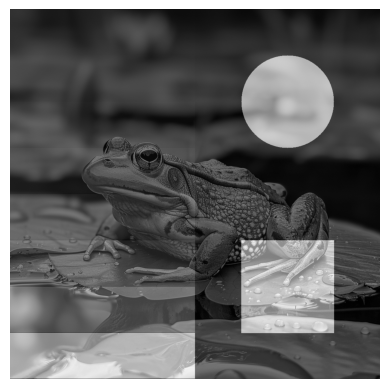

In [287]:
# Obs: OpenCV provee esta misma funcion mediante cv2.normalize.

imshow(
    cv2.normalize(
        img1.astype(float) + img2.astype(float),
        None,
        alpha=0,
        beta=255,
        norm_type=cv2.NORM_MINMAX
    )
)

## Resta de imagenes

Implementar la transformación resta $ h = T (f, g) $ como

$ T =
    \begin{cases}
      r - s & \text{si} (r - s) \ge 0 \\
      0 & \text{else} \\
    \end{cases}
$


In [288]:
def resta(f, g):

  # resta

  h = f.astype(float) - g.astype(float)
  h[h < 0] = 0
  return h.astype('uint8')

In [289]:
h = resta(f, g)

In [290]:
h

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,   0,   0,   0,   0,   0,   0],
       [  0,   0,   6,   0,   0,   0,   0,   0],
       [  0,   0,   0,  14,   0,   0,   0,   0],
       [  0,   0,   0,   0,  30,   0,   0,   0],
       [  0,   0,   0,   0,   0,  62,   0,   0],
       [  0,   0,   0,   0,   0,   0, 126,   0],
       [  0,   0,   0,   0,   0,   0,   0, 254]], dtype=uint8)

In [291]:
# Underflow:
# que pasa si tras la resta obtengo un numero negativo?

## Imagen Negativa

La transformacion negativo está definida por

$ g = T(f) $ donde

$ T( r ) = L - 1 - r $


In [292]:
def negativo(f):
  return 255 - f

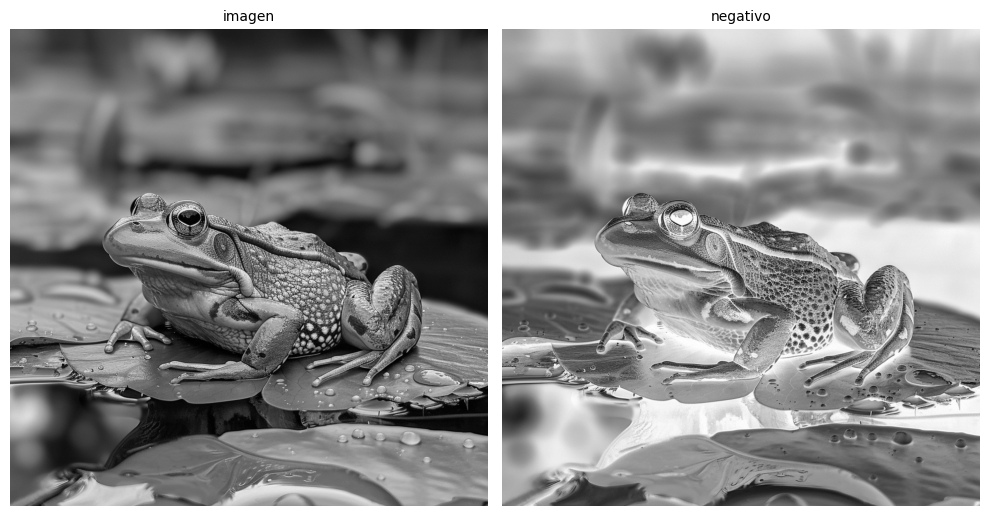

In [293]:
show_images([
    img1,
    negativo(img1),
], ["imagen", "negativo"])

## Transformación como un vector indexado

Podemos pensar s como un vector de valores donde para cada posicón de r tenemos su correspondiente valor de la imagen transformada.

$ s = T(r) $

In [294]:
# Podemos implementar la trasnformación con dicho vector.
def negativo(r):
  s = 255 - r
  return s

r = np.array(range(256))
s = negativo(r)

In [295]:
# OBS: r y s son vectores 1d. Son mapeos de valores de gris en valores de gris.

# Creemos una función para plotear esta transformación:
def plot_transform(r, s, label=None, title=None, fig=None):
  if fig is None:
    plt.figure(figsize=(5, 5))
  if not isinstance(s, list):
    ss = [s]
  else:
    ss = s

  legend = True
  if label is None:
    legend = False
    ls = [None] * len(ss)
  else:
    if not isinstance(label, list):
      ls = [label] * len(ss)
    else:
      ls = label

  for s, lbl in zip(ss, ls):
    plt.plot(r, s, label=lbl, linewidth=3)

  plt.grid()
  plt.xlabel("r")
  plt.ylabel("s")
  plt.title(title)
  if legend:
    plt.legend()
  plt.ylim(0, 256)
  plt.xlim(0, 256)



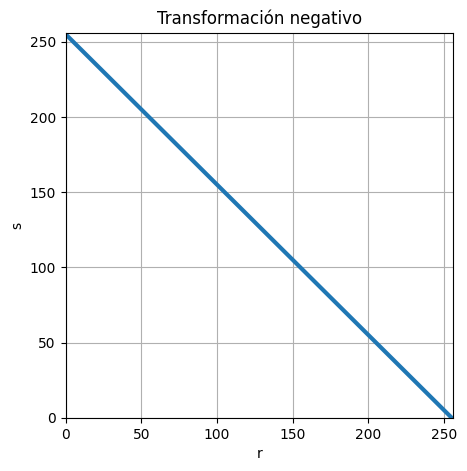

In [296]:
plot_transform(r, s, title="Transformación negativo")

In [297]:
negativo(r)

array([255, 254, 253, 252, 251, 250, 249, 248, 247, 246, 245, 244, 243,
       242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 230,
       229, 228, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217,
       216, 215, 214, 213, 212, 211, 210, 209, 208, 207, 206, 205, 204,
       203, 202, 201, 200, 199, 198, 197, 196, 195, 194, 193, 192, 191,
       190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178,
       177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165,
       164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 154, 153, 152,
       151, 150, 149, 148, 147, 146, 145, 144, 143, 142, 141, 140, 139,
       138, 137, 136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126,
       125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113,
       112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100,
        99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,  87,
        86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  7

In [298]:
# Cómo podemos aplicar la transformación a la imagen dado s?

def apply_transform_for(img, r, s):

  ret = np.zeros_like(img)
  for v in r:
    # apply naive
    # para cada posible valor de gris,
    # donde la imagen original coincide con dicho valor
    # escribo en ret ese mismo valor
    # ret[...] = ...

    ret[img == v] = s[v]
  return ret


In [299]:
img = cv2.imread("res/frog.jpg", 0)

In [300]:
r = np.array(range(256))
s = negativo(r)

neg = apply_transform_for(img, r, s)

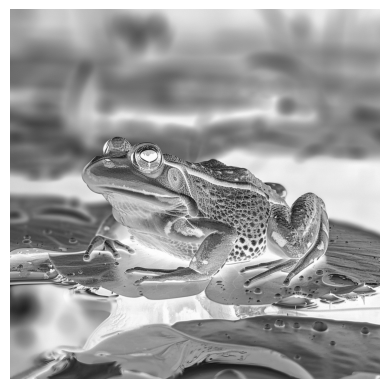

In [301]:
imshow(neg)

In [302]:
# Cómo se puede hacer lo mismo pero sin usar for?
# HINT: usar que numpy permite indexar un array
# con otro de la siguiente manera:
arr1 = np.array([1, 2, 3])
arr2 = np.array([[0, 2], [1, 2]])


In [303]:
arr1

array([1, 2, 3])

In [304]:
arr2

array([[0, 2],
       [1, 2]])

In [305]:
# OBS:
# - el shape de esta expresion es igual a arr2.
# - los valores resultantes son los de indexar en arr1 usando como índice los valores de arr2

arr1[arr2]


array([[1, 3],
       [2, 3]])

In [306]:
def apply_transform(img, s):

  return s[img]

In [307]:
r = np.array(range(256))
s = negativo(r)

neg2 = apply_transform(img, s)

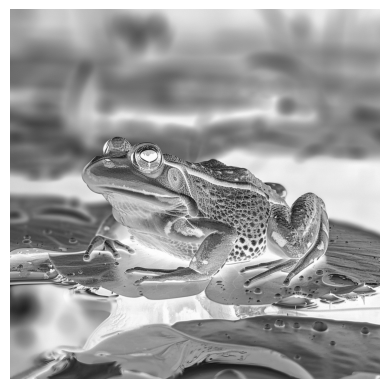

In [308]:
imshow( neg2 )

## Transformación Threshold (o Umbral)


In [309]:
def threshold(f, k):

  # usando numpy
  # computar la transformación treshold
  # que dada la imagen f y el threshold k genera otra imagen "dejando pasar"
  # los valores mayores que k.

  h = np.zeros_like(f)
  mask = f > k
  h[mask] = f[mask]
  return h


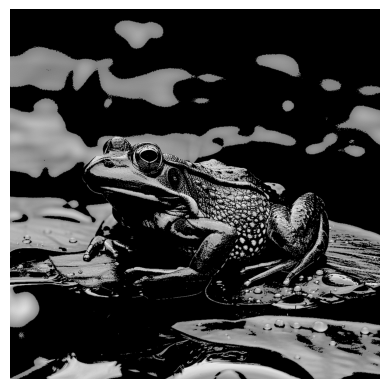

In [310]:
imshow(
    threshold(img1, 127)
)

En OpenCV podemos usar la funcion `cv2.threshold` para lograr el mismo resultado.
Ver [Simple Thresholding](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html).

Esta función permite [otras variantes](https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a147222a96556ebc1d948b372bcd7ac59), dependiendo de los parámetros que usemos para invocarla.



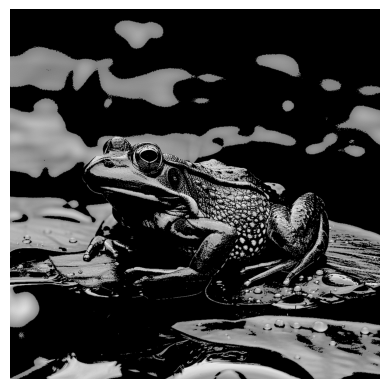

In [311]:
# Threshold con OpenCV:
imshow(
    cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)[1]
)


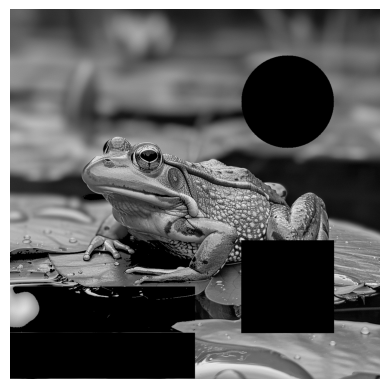

In [312]:
# obs: con Numpy podemos también usar una imagen como threshold :)
# con OpenCV no se puede
imshow(
    threshold(img1, img2)
)

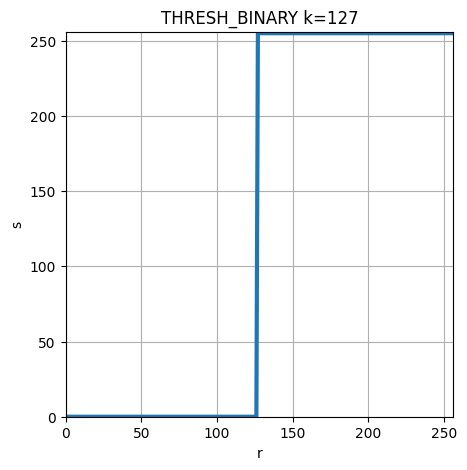

In [313]:
k = 127

# Equivalente a cv2.THRESH_BINARY
title = f"THRESH_BINARY k={k}"
s = np.zeros(256)
s[k:] = 255

# Equivalente a cv2.THRESH_TOZERO
#title = f"THRESH_TOZERO k={k}"
#s = np.array(range(256))
#s[:k] = 0

plot_transform(r, s, title=title)

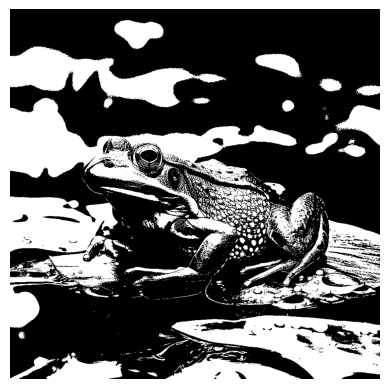

In [314]:
imshow(

    apply_transform(img, s)

)


## Compresión de Rango Dinámico

La compresión del rango dinámico se utiliza para resaltar alguna zona de la imagen que dado el contraste original no es posible observar detalles.

$ T(r) = c * log(r + 1) $

Podemos hallar $ c $ tal que:

$ T( 0 ) = 0 $,

$ T( R ) = L - 1 $

donde R es el máximo valor de la imagen.



[[  1.   1.   1.   1.   1.   1.   1.   1.]
 [  1.   3.   1.   1.   1.   1.   1.   1.]
 [  1.   1.   7.   1.   1.   1.   1.   1.]
 [  1.   1.   1.  15.   1.   1.   1.   1.]
 [  1.   1.   1.   1.  31.   1.   1.   1.]
 [  1.   1.   1.   1.   1.  63.   1.   1.]
 [  1.   1.   1.   1.   1.   1. 127.   1.]
 [  1.   1.   1.   1.   1.   1.   1. 255.]]


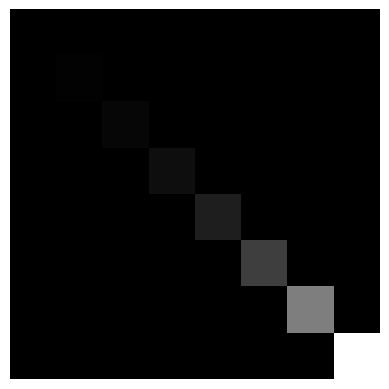

In [315]:
import numpy as np

def get_f():
    f = np.ones((8, 8), dtype='uint8')
    for i in range(8):
      f[i, i] = 2 ** (i + 1) - 1
    f = f.astype(float)
    return f

f = get_f()

print(f)
imshow(f)

In [316]:
def rango_dinamico(f):

  # TODO 10: rango dinámico
  # hallar la transformación de rango dinámico

  R = np.max(f)
  # c * log(R + 1) = L - 1
  # => c = L - 1 / log(R + 1)
  c = 255 / np.log(R + 1)

  return c * np.log(f.astype(float) + 1)


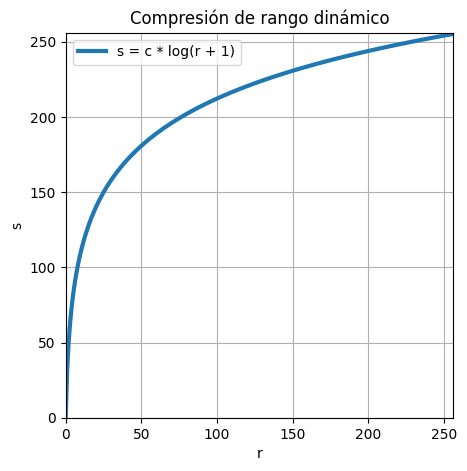

In [317]:
r = np.array(range(256))
s = rango_dinamico(r)

plot_transform(
    r, s,
    title="Compresión de rango dinámico",
    label="s = c * log(r + 1)"
)

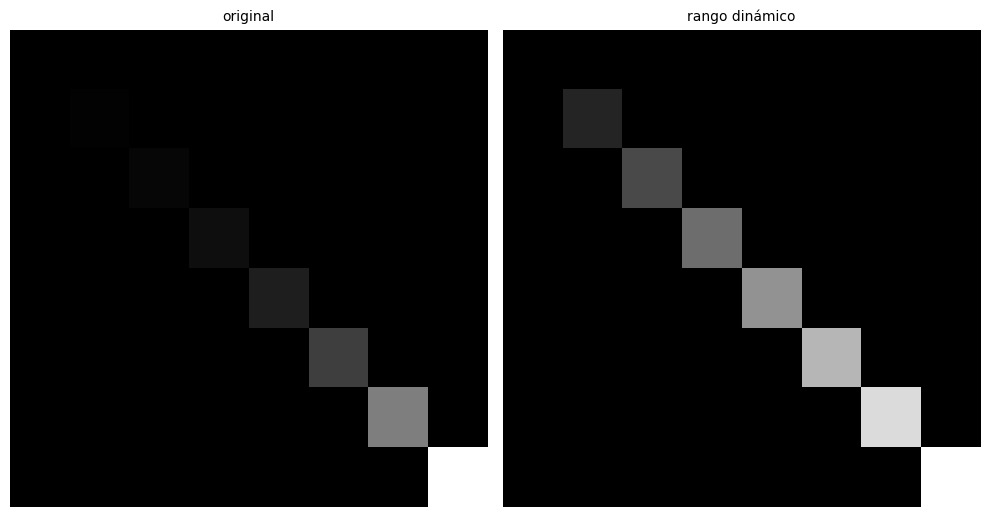

In [318]:
show_images(
    [f, rango_dinamico(f)],
    ["original", "rango dinámico"],
)

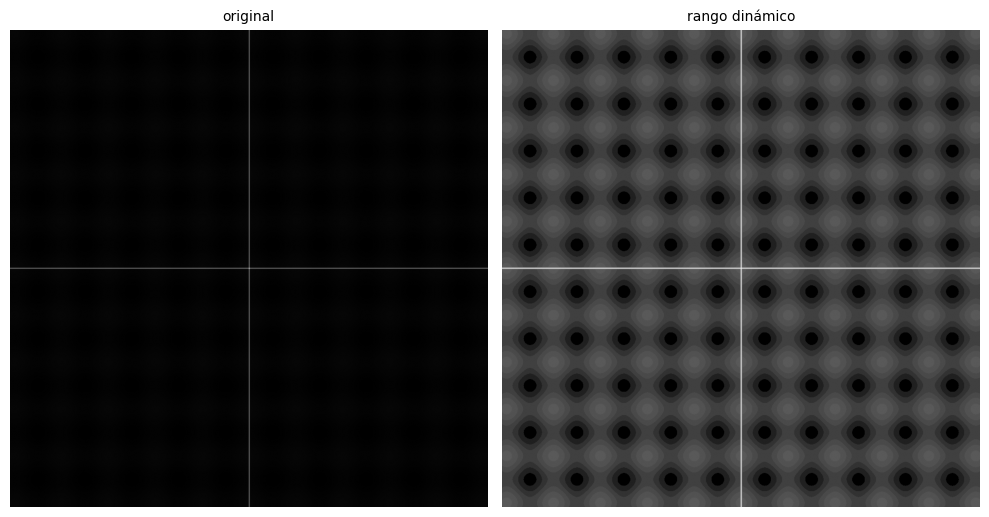

In [319]:
# Probar compresion de rango dinamico en la imagen
# res/rango_dinamico.png
img_rd = cv2.imread("res/rango_dinamico.png", cv2.IMREAD_GRAYSCALE)
img_rd = img_rd.astype(float)
show_images([
    img_rd,
    rango_dinamico(img_rd)
], ["original", "rango dinámico"])

# Histograma de imagen

Un histograma de imagen es una representación gráfica que muestra la distribución de los niveles de intensidad de los píxeles en la imagen. Para una imagen en escala de grises, el histograma indica cuántos píxeles tienen cada valor de intensidad entre 0 (negro) y 255 (blanco).
Para una imagen en color, se puede calcular un histograma por cada canal (Rojo, Verde y Azul), obteniendo tres histogramas separados.

## Histograma normalizado

Cada elemento del histograma normalizado está dado por:
$ h_i = \frac{n_i}{N} $

Donde:
$ n_i $ es la cantidad de píxeles de la imagen con el valor de gris i.

$ N $ la cantidad total de píxeles de la imagen (es decir $ W * H $)


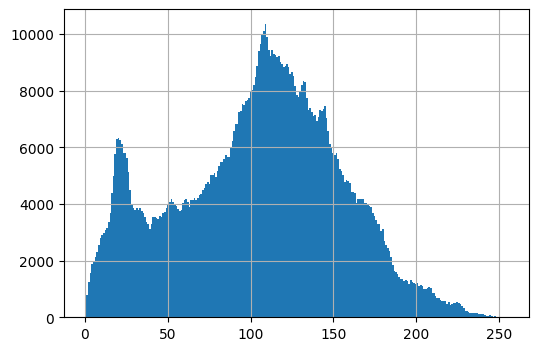

In [320]:
# graficar el histograma de la imagen img

# Se puede computar el histograma de la imagen usando numpy
# pero si lo que queremos es simplemente plotear, podemos usar matplotlib
#def histograma(img):
#
#  return np.histogram(img.reshape(-1), bins=256)

from matplotlib import pyplot as plt

plt.figure(figsize=(6, 4))
plt.hist(img.reshape(-1), bins=256)
# plt.hist(img.reshape(-1), bins=256, density=True)

plt.grid()
plt.show()

## Aumento de contraste

(contrast stretching)

Podemos definir la funcion partida de definiendo c1, y c2, y la pendiente del contraste a

In [321]:
def contraste(r, c1, c2, a):

    # implementar una transformación de aumento de contraste
    # como una función partida por 3 rectas l0, l1 y l2
    # dados los valores de corte c1, c2, y a
    # siendo a la pendiente de l0 y l2

    # l0: 0 = a.0 + b => b = 0
    b0 = 0

    # l2: 255 = a. 255 + b2
    b2 = 255 * (1 - a)

    # calculo y1, y2
    y1 = a * c1 + 0
    y2 = a * c2 + b2

    # l1: y = a1 . r + b1
    # y1 = a1 . c1 + b1
    # y2 = a1 . c2 + b1
    # y1 - y2 = a1 . (c1 - c2)
    # b1 = y1 - a1 . c1
    a1 = (y1 - y2) / (c1 - c2)
    b1 = y1 - a1 * c1

    s0 = a * r + b0
    s1 = a1 * r + b1
    s2 = a * r + b2

    mask_0 = r < c1
    mask_1 = (r >= c1) & (r < c2)
    mask_2 = r >= c2

    s = s0 * mask_0 + s1 * mask_1 + s2 * mask_2
    return s

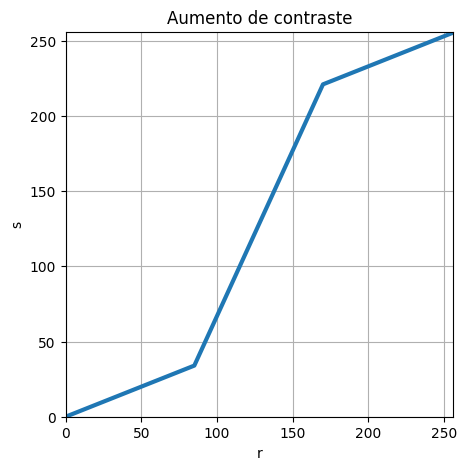

In [322]:
a = 0.4
c1 = 255 * 1 / 3
c2 = 255 * 2 / 3
# print(c1)
# print(c2)
# c1 = 64

r = np.array(range(256))
s = contraste(r, c1, c2, a)

plot_transform(r, s, title="Aumento de contraste")

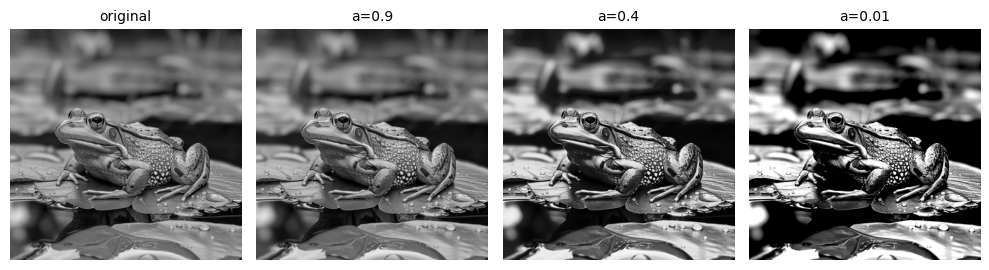

In [323]:
show_images([
    img1,
    contraste(r, c1, c2, a=0.9)[img1],
    contraste(r, c1, c2, a=0.4)[img1],
    contraste(r, c1, c2, a=0.01)[img1],
], ['original', 'a=0.9', 'a=0.4', 'a=0.01'])

## Gamma Correction

Los monitores y displays no generan en la pantalla una intensidad de luz linealmente proporcional a los valores que se quieren representar.

Ejemplo si tengo un valor 0, mando voltage minimo y tengo negro, si tengo 255, mando mando voltage máximo tengo brillo máximo, pero si tengo 127, y mando 0.5, no necesariamente voy a tener el brillo medio.

Gamma Correction se usa para compensar este problema.

$ s = T(r) = c * (r + ϵ) ^ {\gamma} $

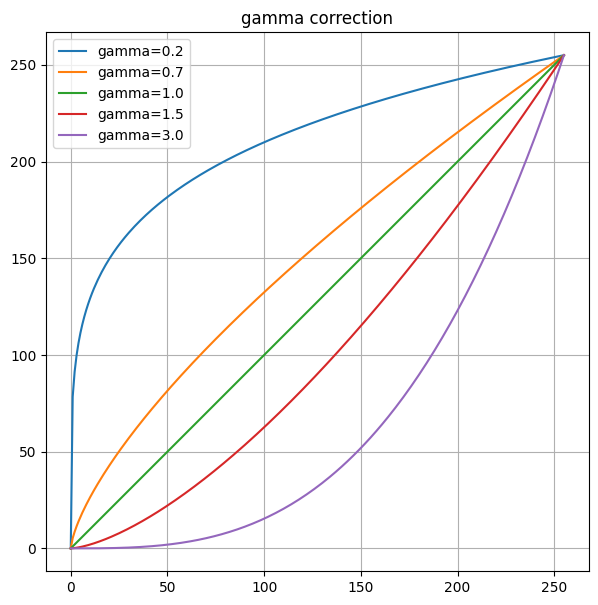

In [324]:
# Gamma Correction

gammas = np.array([0.2, 0.7, 1, 1.5, 3])

# Gamma correction
# 1. generar las transformacion para los siguientes gammas propuestos
# 2. graficar s en funcion de r, para cada gamma.
# graficar la imagen correspondiente a aplicar la transformacion

s_gammas = [
    (r + 0.00001) ** gamma
    for gamma in gammas
]
# scale
s_gammas = [
    255 * (s - min(s)) / (max(s) - min(s))
    for s in s_gammas
]

plt.figure(figsize=(7, 7))
for gamma, s in zip(gammas, s_gammas):
  plt.plot(r, s, label=f'gamma={gamma}')
plt.grid()
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.axis('equal')
plt.title("gamma correction")
plt.legend()
plt.show()

In [325]:
img = cv2.imread("res/frog.jpg", flags=cv2.IMREAD_GRAYSCALE)

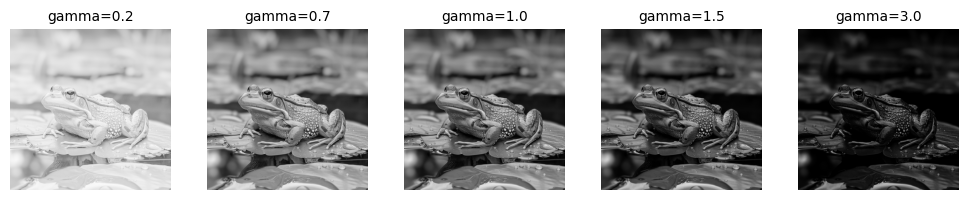

In [326]:
images = [
    s_gamma[img]
    for s_gamma in s_gammas
]
titles = [
    f"gamma={gamma}"
    for gamma in gammas
]

show_images(images, titles=titles)

# Ecualización de histograma

La ecualización del histograma consiste en encontrar una transformación que haga que la
distribución del histograma de la imagen de salida tenga distribución uniforme.



$ s_k = \sum\limits_{i=0}^{k} \frac{n_i}{N} = \sum\limits_{i=0}^{k} h_{n_i} $

básicamente $ s_k $ es la función de distribución acumulada de niveles de gris en la imagen.


Sean:
 - $ s_v $ variable aleatoria valores de salida
 - $ r_v $ variable aleatoria valores de entrada
 - $ F_{r_v}(r) $ funcion de distribución acumulada correspondiente a $ r_v $

Buscamos una transformacion
$ s = T(r_v), s \approx U[0, L-1] $


$ s = F_{s_v}( s ) = P(s_v \le s) = P(T(r_v) \le s) = P( r_v \le T^{-1}(s)) = F_{r_v} (T^{-1}(s)) = F_{r_v}( r ) $

Quiere decir que la transformacion que estamos buscando es la distribucion acumulada de $ r $:

$ s = F_{r_v}( r ) $



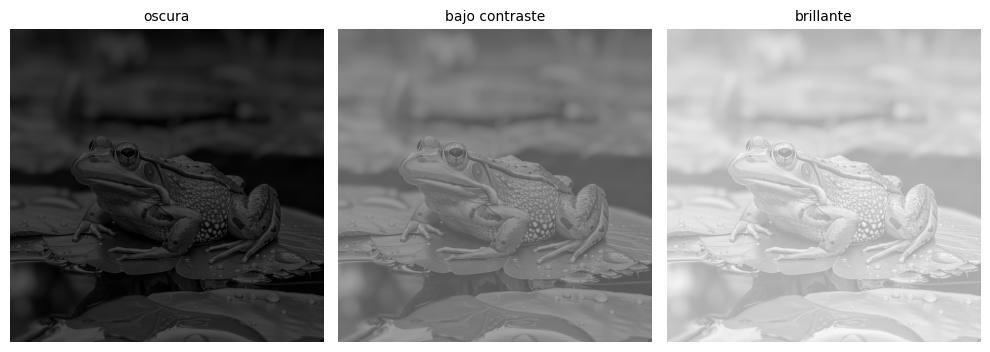

In [327]:
# a continuación se cargan 3 imágenes una oscura otra de bajo contraste
# y otra brillante:

img = cv2.imread("res/frog.jpg", flags=cv2.IMREAD_GRAYSCALE)
img_dark = cv2.imread("res/frog_dark.jpg", cv2.IMREAD_GRAYSCALE)
img_lowc = cv2.imread("res/frog_lowc.jpg", cv2.IMREAD_GRAYSCALE)
img_bright = cv2.imread("res/frog_bright.jpg", cv2.IMREAD_GRAYSCALE)

show_images([
    img_dark,
    img_lowc,
    img_bright
], [
    "oscura", "bajo contraste", "brillante"
])



In [328]:
# Ejercicio:
# 1. Graficar los histogramas de las imagenes img_dark, img_lowc, img_bright
# 2. Implementar la transformación de equalizacion para una imagen de entrada
# 3. Graficar las transformaciones de equalizacion de las 3 imagenes propuestas (t vs s)
# 4. Ecualizar las imagenes
# 5. Graficar las imagenes ecualizadas
# 6. Graficar los histogramas de las imagenes ecualizadas.
# 7. Verificar que las imagenes ecualizadas tienen histogramas con distribución uniforme.


In [329]:
img = cv2.imread("res/frog.jpg", flags=cv2.IMREAD_GRAYSCALE)

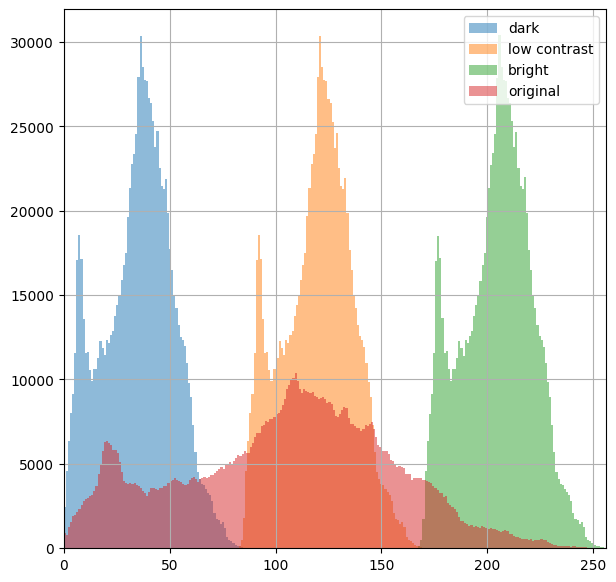

In [330]:
# imshow(f)
plt.figure(figsize=(7, 7))
plt.hist(img_dark.reshape(-1), bins=256, label='dark', range=(0, 255), alpha=0.5)
plt.hist(img_lowc.reshape(-1), bins=256, label='low contrast', range=(0, 255), alpha=0.5)
plt.hist(img_bright.reshape(-1), bins=256, label='bright', range=(0, 255), alpha=0.5)
plt.hist(img.reshape(-1), bins=256, label='original', range=(0, 256), alpha=0.5)
plt.xlim(0, 256)
plt.grid()
plt.legend()
plt.show()

In [331]:
# cv2.imwrite("recursos/frog_dark.jpg", img_dark)
# cv2.imwrite("recursos/frog_lowc.jpg", img_lowc)
# cv2.imwrite("recursos/frog_bright.jpg", img_bright)


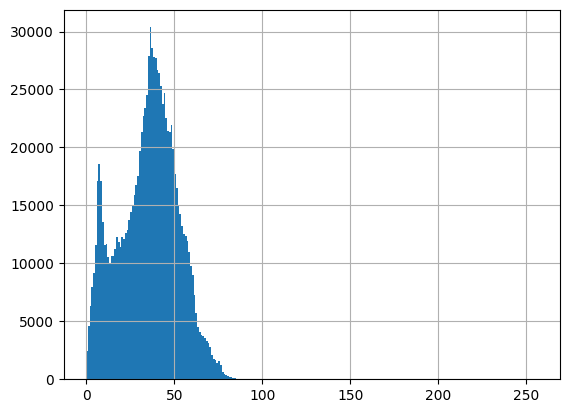

In [332]:
#hist = np.histogram(img_dark.reshape(-1), bins=8, range=(0, 256))
freq, bins = np.histogram(img_dark, bins=256, range=(0, 256))
bins = ( bins[:len(bins) - 1] + bins[1:] ) / 2
plt.bar(bins, freq, width=1)
plt.grid()
plt.show()

In [333]:
def t_ecualizar(img):

  s = np.zeros(256, dtype='float')
  h, w = img_dark.shape
  N = w * h

  sum_k = 0
  for k in range(256):
    sum_k += np.sum(img == k) / N
    s[k] = 255.0 * sum_k

  return s

def ecualizar(img):
  return t_ecualizar(img)[img]

In [334]:
# 4. Ecualizar las imágenes

s_dark = t_ecualizar(img_dark)
s_lowc = t_ecualizar(img_lowc)
s_bright = t_ecualizar(img_bright)

eq_dark = apply_transform(img_dark, s_dark)
eq_lowc = s_lowc[img_lowc]
eq_bright = s_bright[img_bright]


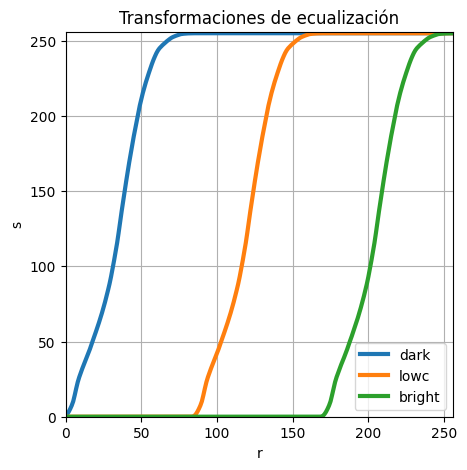

In [335]:
# 5. Graficar las imágenes ecualizadas

plot_transform(
    r,
    [s_dark, s_lowc, s_bright],
    [
        "dark",
        "lowc",
        "bright",
    ],
    title="Transformaciones de ecualización"

)

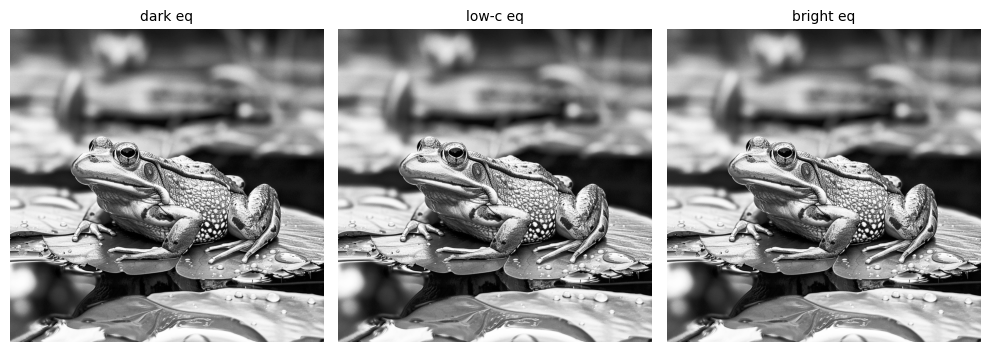

In [336]:
# 6. Graficar los histogramas de las imágenes ecualizadas.

show_images([
    eq_dark,
    eq_lowc,
    eq_bright,
], [
    "dark eq",
    "low-c eq",
    "bright eq"
])


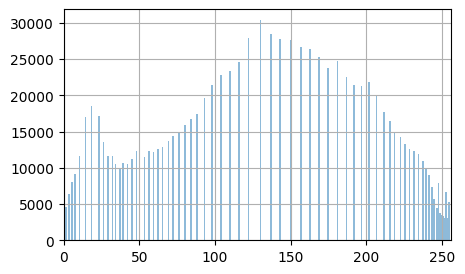

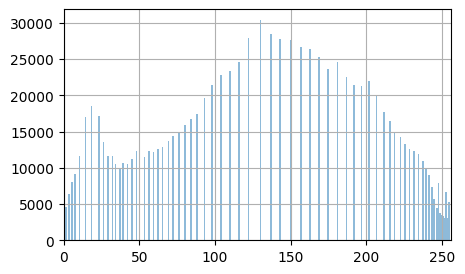

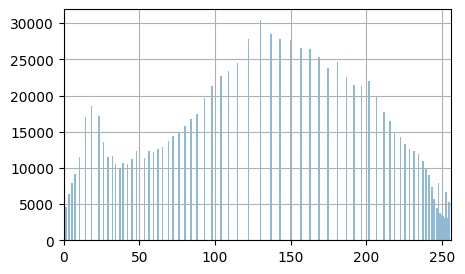

In [337]:
for img in [eq_dark, eq_lowc, eq_bright]:

  plt.figure(figsize=(5, 3))
  #plt.hist(eq_dark.reshape(-1), bins=256, label='dark', range=(0, 255), alpha=0.5)
  #plt.hist(eq_lowc.reshape(-1), bins=256, label='low contrast', range=(0, 255), alpha=0.5)
  plt.hist(img.reshape(-1), bins=256, range=(0, 255), alpha=0.5)
  #plt.hist(img.reshape(-1), bins=256, label='original', range=(0, 256), alpha=0.5)
  plt.xlim(0, 256)
  plt.grid()
  # plt.legend()
  plt.show()

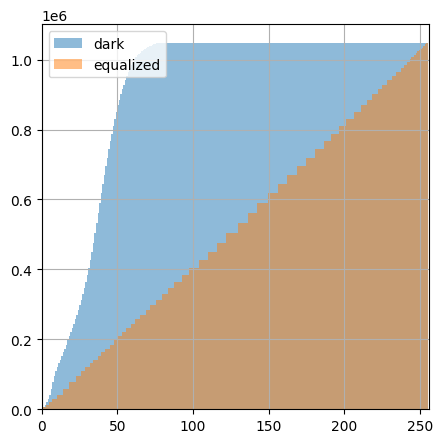

In [338]:
# Los histogramas de las ecualizads son uniformes?

# Si una imagen tiene un histograma uniforme, significa que todas las intensidades tienen aproximadamente
# la misma probabilidad de ocurrencia.
# => CDF(x) = x / 255, esta ecuación describe una recta de pendiente constante.
# Podemos usar la opción cumulative de hist, que nos permite graficar el histograma de la CDF:

plt.figure(figsize=(5, 5))
plt.hist(
    img_dark.reshape(-1), bins=256, range=(0, 255),
    cumulative=True, alpha=0.5, label='dark')
plt.hist(
    eq_dark.reshape(-1), bins=256, range=(0, 255),
    cumulative=True, alpha=0.5, label='equalized')

plt.legend()
plt.xlim(0, 256)
plt.grid()
plt.show()

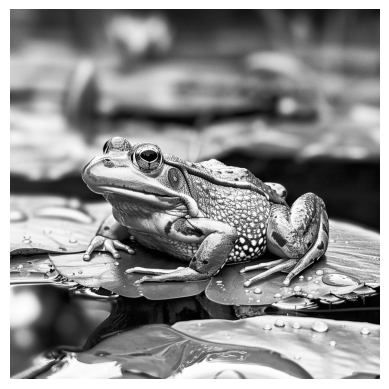

In [339]:
eq = cv2.equalizeHist(img_bright)
imshow(eq)

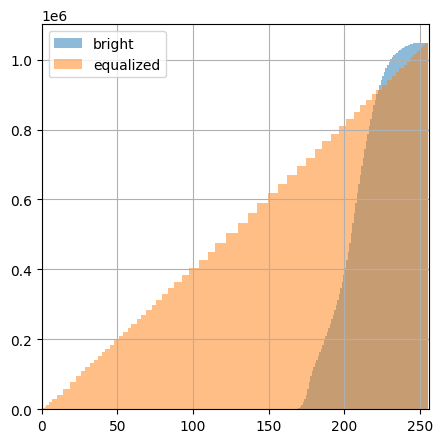

In [340]:
plt.figure(figsize=(5, 5))
plt.hist(
    img_bright.reshape(-1), bins=256, range=(0, 255),
    cumulative=True, alpha=0.5, label='bright')
plt.hist(
    eq.reshape(-1), bins=256, range=(0, 255),
    cumulative=True, alpha=0.5, label='equalized')

plt.legend()
plt.xlim(0, 256)
plt.grid()
plt.show()